In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv("opp-edge-eval-runs.csv", parse_dates=['time_stamp'])
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype                                
---  ------         --------------  -----                                
 0   scenario_id    168 non-null    int64                                
 1   simulation_id  168 non-null    object                               
 2   trail_id       168 non-null    int64                                
 3   time_stamp     168 non-null    datetime64[ns, pytz.FixedOffset(120)]
 4   provider_id    168 non-null    object                               
 5   command        168 non-null    object                               
 6   step           168 non-null    int64                                
 7   match_id       168 non-null    object                               
 8   run_config     156 non-null    object                               
 9   run_number     156 non-null    float64                              
 10  er

,scenario_id,simulation_id,trail_id,time_stamp,provider_id,command,step,match_id,run_config,run_number,error
0,123,tictoc-540cf318,1,2021-08-28 13:45:18.303982+02:00,raspberry3b-89798c31,Checkout,1,0x7129134d,NaN,NaN,NaN
1,123,tictoc-540cf318,1,2021-08-28 13:45:18.508007+02:00,raspberry3b-89798c31,Checkout,2,0x7129134d,NaN,NaN,NaN
2,123,tictoc-540cf318,1,2021-08-28 13:45:18.564350+02:00,raspberry3b-89798c31,Compile,1,0xe5142332,NaN,NaN,NaN
3,123,tictoc-540cf318,1,2021-08-28 13:45:19.312179+02:00,raspberry4-980aff71,Checkout,1,0x391f043b,NaN,NaN,NaN
4,123,tictoc-540cf318,1,2021-08-28 13:45:19.399679+02:00,raspberry3-9f5b711c,Checkout,1,0x39c0781a,NaN,NaN,NaN


In [51]:
dfs = pd.read_csv("opp-edge-eval-setup.csv", parse_dates=['time_stamp'])
dfs.info()
dfs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype                                
---  ------         --------------  -----                                
 0   scenario_id    3 non-null      int64                                
 1   simulation_id  3 non-null      object                               
 2   trail_id       3 non-null      int64                                
 3   time_stamp     3 non-null      datetime64[ns, pytz.FixedOffset(120)]
 4   connect        3 non-null      object                               
 5   provider_id    3 non-null      object                               
 6   num_cpus       3 non-null      int64                                
 7   arch           3 non-null      object                               
 8   os             3 non-null      object                               
dtypes: datetime64[ns, pytz.FixedOffset(120)](1), int64(3), object(5)
memory usage: 34

,scenario_id,simulation_id,trail_id,time_stamp,connect,provider_id,num_cpus,arch,os
0,123,tictoc-540cf318,1,2021-08-28 13:45:14.120854+02:00,Relay,raspberry3b-89798c31,4,arm64,linux
1,123,tictoc-540cf318,1,2021-08-28 13:45:14.486061+02:00,Relay,raspberry3-9f5b711c,4,arm64,linux
2,123,tictoc-540cf318,1,2021-08-28 13:45:14.493625+02:00,Relay,raspberry4-980aff71,4,arm64,linux


Text(0.5, 1.0, 'Total executions per provider')

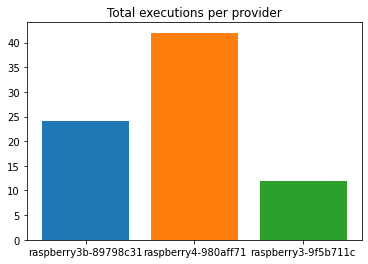

In [5]:
import matplotlib.pyplot as plt

providers = df.provider_id.unique()

for provider in providers:
    executions = df.loc[(df.provider_id == provider) & (df.command == "Execution") & (df.step == 1)].match_id.unique()
    plt.bar(provider, len(executions))

plt.title("Total executions per provider")

/opt/conda/lib/python3.9/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


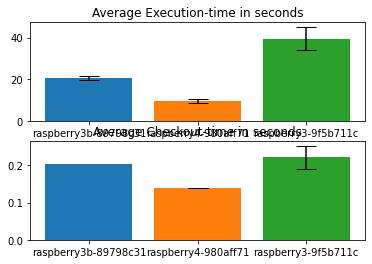

In [6]:
from typing import Tuple

#commands = df.command.unique()
commands = ["Execution", "Checkout"]
fig, ax = plt.subplots(len(commands))

for inx in range(len(commands)):
    command = commands[inx]
    for provider in providers:
        execution_start = df.loc[(df.provider_id == provider) & (df.command == command) & (df.step == 1)].sort_values(by=['match_id'])
        execution_end   = df.loc[(df.provider_id == provider) & (df.command == command) & (df.step == 2)].sort_values(by=['match_id'])

        durations = pd.to_timedelta(execution_end.time_stamp.values - execution_start.time_stamp.values)
        mean = durations.mean()
        std = durations.std()

        ax[inx].bar(provider, mean.total_seconds(), yerr=std.total_seconds(), capsize=10)
        ax[inx].set_title(f"Average {command}-time in seconds")

In [7]:
dft = pd.read_csv("opp-edge-eval-transfers.csv", parse_dates=['time_stamp'])
dft.info()
dft.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype                                
---  ------             --------------  -----                                
 0   scenario_id        168 non-null    int64                                
 1   simulation_id      168 non-null    object                               
 2   trail_id           168 non-null    int64                                
 3   time_stamp         168 non-null    datetime64[ns, pytz.FixedOffset(120)]
 4   provider_id        168 non-null    object                               
 5   step               168 non-null    int64                                
 6   match_id           168 non-null    object                               
 7   direction          168 non-null    object                               
 8   bytes_transferred  168 non-null    int64                                
 9   error              0 non-null   

,scenario_id,simulation_id,trail_id,time_stamp,provider_id,step,match_id,direction,bytes_transferred,error
0,123,tictoc-540cf318,1,2021-08-28 13:45:14.182027+02:00,raspberry3b-89798c31,1,0x2735037f,Upload,0,NaN
1,123,tictoc-540cf318,1,2021-08-28 13:45:14.537951+02:00,raspberry3-9f5b711c,1,0x1b318f11,Upload,0,NaN
2,123,tictoc-540cf318,1,2021-08-28 13:45:14.554132+02:00,raspberry4-980aff71,1,0x5dc46ad6,Upload,0,NaN
3,123,tictoc-540cf318,1,2021-08-28 13:45:18.303937+02:00,raspberry3b-89798c31,2,0x2735037f,Upload,459164,NaN
4,123,tictoc-540cf318,1,2021-08-28 13:45:19.312113+02:00,raspberry4-980aff71,2,0x5dc46ad6,Upload,459164,NaN


Text(0.5, 1.0, 'Bytes transferred')

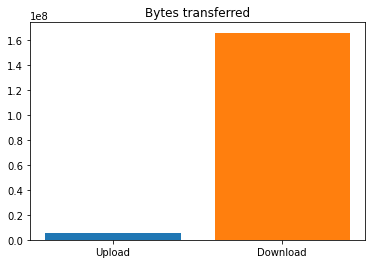

In [8]:
t_uploaded = dft.loc[(dft.direction == "Upload")].bytes_transferred
plt.bar("Upload", t_uploaded.sum())

t_downloaded = dft.loc[(dft.direction == "Download")].bytes_transferred
plt.bar("Download", t_downloaded.sum())

plt.title("Bytes transferred")

Upload raspberry3b-89798c31 459164 4.12191 0.11139593052735262
Upload raspberry3-9f5b711c 2556316 8.124676 0.31463605441004666
Upload raspberry4-980aff71 2556316 7.455781 0.3428636114714206
Download raspberry3b-89798c31 52428800 347.592963 0.15083389360790944
Download raspberry3-9f5b711c 25165824 199.77129 0.1259731766261308
Download raspberry4-980aff71 88080384 1052.372068 0.0836969990731453


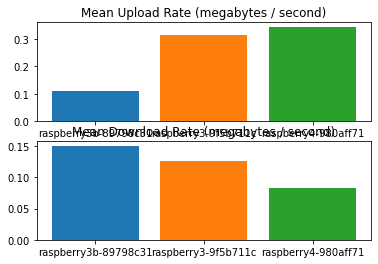

In [20]:
directions = dft.direction.unique()
providers = dft.provider_id.unique()
fig, ax = plt.subplots(len(directions))

for inx in range(len(directions)):
    direction = directions[inx]
    for provider in providers:
        start = dft.loc[(dft.provider_id == provider) & (dft.direction == direction) & (dft.step == 1)].sort_values(by=['match_id'])
        end   = dft.loc[(dft.provider_id == provider) & (dft.direction == direction) & (dft.step == 2)].sort_values(by=['match_id'])
        
        durations = pd.to_timedelta(end.time_stamp.values - start.time_stamp.values)
        transferspeed = (end.bytes_transferred.sum() / 1000000) / durations.sum().total_seconds()

        print(direction, provider, end.bytes_transferred.sum(), durations.sum().total_seconds(), transferspeed)

        ax[inx].bar(provider, transferspeed)
        ax[inx].set_title(f"Mean {direction} Rate (megabytes / second)")
        

Upload raspberry3b-89798c31 459164 4.12191 0.11139593052735262
Download raspberry3b-89798c31 52428800 347.592963 0.15083389360790944
Upload raspberry3-9f5b711c 2556316 8.124676 0.31463605441004666
Download raspberry3-9f5b711c 25165824 199.77129 0.1259731766261308
Upload raspberry4-980aff71 2556316 7.455781 0.3428636114714206
Download raspberry4-980aff71 88080384 1052.372068 0.0836969990731453


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

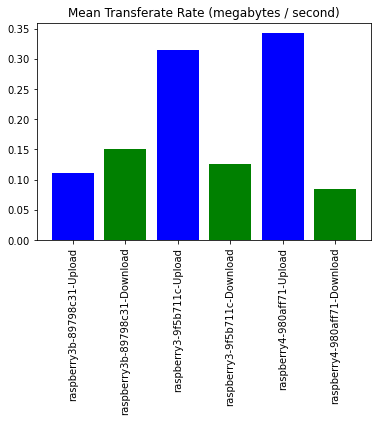

In [11]:
directions = dft.direction.unique()
providers = dft.provider_id.unique()

colors = ["blue", "green"]

for provider in providers:
    for inx in range(len(directions)):
        direction = directions[inx]
        start = dft.loc[(dft.provider_id == provider) & (dft.direction == direction) & (dft.step == 1)].sort_values(by=['match_id'])
        end   = dft.loc[(dft.provider_id == provider) & (dft.direction == direction) & (dft.step == 2)].sort_values(by=['match_id'])
        
        durations = pd.to_timedelta(end.time_stamp.values - start.time_stamp.values)
        transferspeed = (end.bytes_transferred.sum() / 1000000) / durations.sum().total_seconds()

        print(direction, provider, end.bytes_transferred.sum(), durations.sum().total_seconds(), transferspeed)
        
        plt.bar(f"{provider}-{direction}", transferspeed, label=direction, color=colors[inx])
        
plt.title(f"Mean Transferate Rate (megabytes / second)")
plt.xticks(rotation=90)


raspberry3b-89798c31 Upload 4.12191
raspberry3b-89798c31 Download 347.592963
raspberry3b-89798c31 Checkout 0.204025
raspberry3b-89798c31 Compile 55.961877
raspberry3b-89798c31 Execution 498.24729
raspberry3-9f5b711c Upload 8.124676
raspberry3-9f5b711c Download 199.77129
raspberry3-9f5b711c Checkout 0.442725
raspberry3-9f5b711c Compile 0.0
raspberry3-9f5b711c Execution 474.658759
raspberry4-980aff71 Upload 7.455781
raspberry4-980aff71 Download 1052.372068
raspberry4-980aff71 Checkout 0.27758
raspberry4-980aff71 Compile 0.0
raspberry4-980aff71 Execution 402.308216


Text(0.5, 1.0, 'Spent time per device')

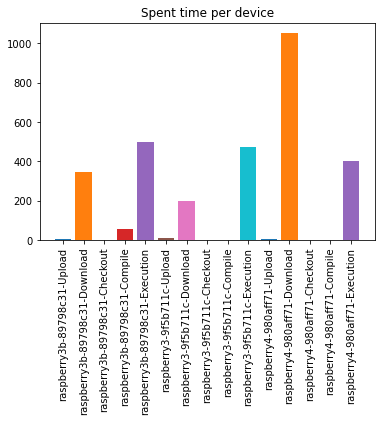

In [48]:
for provider in providers:
    for direction in directions:
        start = dft.loc[(dft.provider_id == provider) & (dft.direction == direction) & (dft.step == 1)].sort_values(by=['match_id'])
        end   = dft.loc[(dft.provider_id == provider) & (dft.direction == direction) & (dft.step == 2)].sort_values(by=['match_id'])
        
        durations = pd.to_timedelta(end.time_stamp.values - start.time_stamp.values)
        time = durations.sum().total_seconds()

        print(provider, direction, time)
        plt.bar(f"{provider}-{direction}", time)

    for command in df.command.unique():
        start = df.loc[(df.provider_id == provider) & (df.command == command) & (df.step == 1)].sort_values(by=['match_id'])
        end   = df.loc[(df.provider_id == provider) & (df.command == command) & (df.step == 2)].sort_values(by=['match_id'])

        durations = pd.to_timedelta(end.time_stamp.values - start.time_stamp.values)
        time = durations.sum().total_seconds()
        
        print(provider, command, time)
        
        plt.bar(f"{provider}-{command}", time)

plt.xticks(rotation=90)
plt.title("Spent time per device")
        

raspberry4-980aff71 Upload 19.702367
raspberry4-980aff71 Download 1599.736321
raspberry4-980aff71 Checkout 0.27758
raspberry4-980aff71 Compile 0.0
raspberry4-980aff71 Execution 402.308216


Text(0.5, 1.0, 'Total time spent')

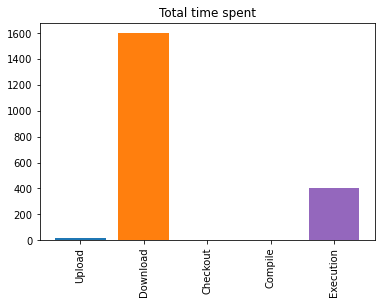

In [52]:
for direction in directions:
    start = dft.loc[(dft.direction == direction) & (dft.step == 1)].sort_values(by=['match_id'])
    end   = dft.loc[(dft.direction == direction) & (dft.step == 2)].sort_values(by=['match_id'])

    durations = pd.to_timedelta(end.time_stamp.values - start.time_stamp.values)
    time = durations.sum().total_seconds()

    print(provider, direction, time)
    plt.bar(f"{direction}", time)

for command in df.command.unique():
    start = df.loc[(df.provider_id == provider) & (df.command == command) & (df.step == 1)].sort_values(by=['match_id'])
    end   = df.loc[(df.provider_id == provider) & (df.command == command) & (df.step == 2)].sort_values(by=['match_id'])

    durations = pd.to_timedelta(end.time_stamp.values - start.time_stamp.values)
    time = durations.sum().total_seconds()

    print(provider, command, time)

    plt.bar(f"{command}", time)

plt.xticks(rotation=90)
plt.title("Total time spent")
